# 연령별 분만건수 분석


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False #한글 폰트

df = pd.read_csv('시군구별 연령별 분만 통계 2018~2022.csv', encoding='cp949')#데이터불러오기

In [2]:
df.head()#불로온 데이터 확인

,년도,시도,시군구,연령구분,분만건수
0,2018,서울,강남구,19세 이하,0
1,2018,서울,강남구,20~29세,1124
2,2018,서울,강남구,30~39세,8000
3,2018,서울,강남구,40~49세,628
4,2018,서울,강남구,50세 이상,0


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder 
import statsmodels.api as sm

data = pd.DataFrame(df)#분석할 데이터 새로 생성

In [4]:
le = LabelEncoder()
data['연령구분_수치'] = le.fit_transform(data['연령구분']) #연령구분 수치로 변경

In [5]:
data.head()#상위 5행 확인 0 1 2 3 4로 되어있는 것을 볼 수 있음

,년도,시도,시군구,연령구분,분만건수,연령구분_수치
0,2018,서울,강남구,19세 이하,0,0
1,2018,서울,강남구,20~29세,1124,1
2,2018,서울,강남구,30~39세,8000,2
3,2018,서울,강남구,40~49세,628,3
4,2018,서울,강남구,50세 이상,0,4


In [6]:
data.tail()#하위 5행 확인

,년도,시도,시군구,연령구분,분만건수,연령구분_수치
6245,2022,세종,세종시,19세 이하,0,0
6246,2022,세종,세종시,20~29세,459,1
6247,2022,세종,세종시,30~39세,2122,2
6248,2022,세종,세종시,40~49세,148,3
6249,2022,세종,세종시,50세 이상,0,4


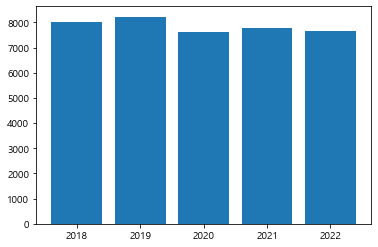

In [7]:
plt.bar(data['년도'], data['분만건수'])#건수에 대한 년도별 막대그래프
plt.show()

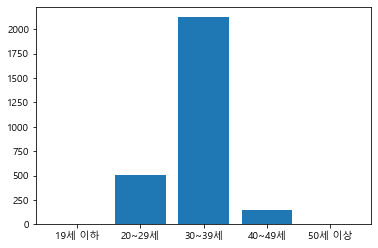

In [8]:
plt.bar(data[data['시군구']=='세종시']['연령구분'], data[data['시군구']=='세종시']['분만건수'])#지역 분만건수 확인
plt.show()

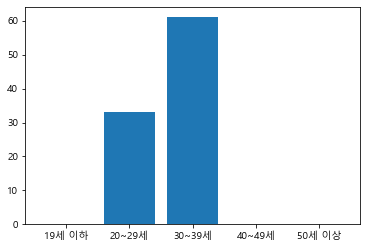

In [9]:
plt.bar(data[data['시군구']=='양평군']['연령구분'], data[data['시군구']=='양평군']['분만건수'])
plt.show()

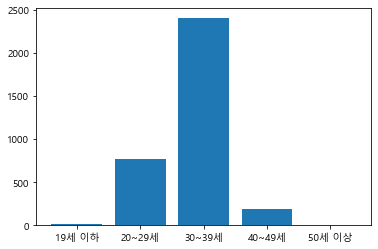

In [10]:
plt.bar(data[data['시도']=='부산']['연령구분'], data[data['시도']=='부산']['분만건수'])#시도별 분만건수 확인
plt.show()

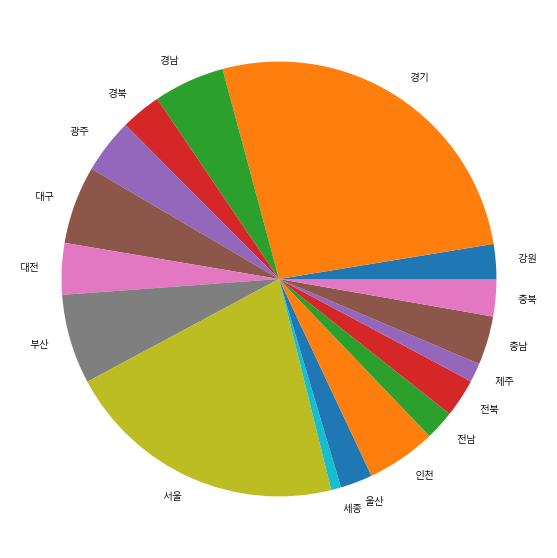

In [11]:
total_birth = data.groupby('시도')['분만건수'].sum()#시도별 분만건수 합

plt.figure(figsize=(10,10))
plt.pie(total_birth, labels=total_birth.index)#시도별 분만건수 원그래프 작성
plt.show()

R-squared: 0.9618238179671009
Coefficients: [-19121.5]
Intercept: 38903227.20000001
회귀식: 분만건수 = 38903227.20000001 + -19121.500000000004 * 년도


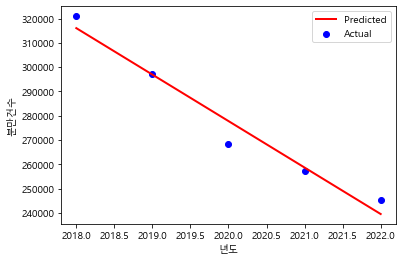

In [12]:
data_yearly_sum = data.groupby('년도')['분만건수'].sum().reset_index()# 년도별 분만건수 합계 계산

x1 = data_yearly_sum[['년도']]
y1 = data_yearly_sum['분만건수']

# 회귀모델 생성 및 학습
model_1 = LinearRegression()
model_1.fit(x1, y1)

# 회귀모델 결과 출력
r_squared = model_1.score(x1, y1)
coefficients = model_1.coef_
intercept = model_1.intercept_

print(f'R-squared: {r_squared}')
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

# 회귀식 출력
print(f"회귀식: 분만건수 = {intercept} + {coefficients[0]} * 년도")

# 예측값 추가
data_yearly_sum['예측값'] = model_1.predict(x1)

# 그래프 그리기
plt.scatter(data_yearly_sum['년도'], data_yearly_sum['분만건수'], color='blue', label='Actual')
plt.plot(data_yearly_sum['년도'], data_yearly_sum['예측값'], color='red', linewidth=2, label='Predicted')
plt.xlabel('년도')
plt.ylabel('분만건수')
plt.legend()
plt.show()
#의미 있는 회귀분석이 됨

In [17]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model_1, x1, y1, cv=2)

print(f'교차 검증 점수: {cross_val_scores}')
print(f'평균 교차 검증 점수: {cross_val_scores.mean()}')
#의미있는 수가 도출되지 않음

교차 검증 점수: [  0.23658052 -13.17015124]
평균 교차 검증 점수: -6.466785362074947
